In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
from Wind.Results import DBResults, DBMeasures
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import seaborn as sns
from Wind.Private.DBConfig import mongolocaltest, mongolocal, mongolocalmeasures
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
from statsmodels.genmod.generalized_linear_model import GLM
import pandas as pd
import numpy as np


In [5]:
query={'experiment':'MLP_s2s_best', 'status':'done'}

results = DBResults(conn=mongolocal)
results.retrieve_results(query)


In [6]:
results.sample(0.5)
a=results.extract_result()

In [7]:
measure = DBMeasures(conn=mongolocalmeasures)

measure.retrieve_measures()


In [8]:


meas = 'SpecEnt'
var='wind_direction_sin'
b1=measure.extract_measure_sites(sites= a[:,0], var='wind_speed', measure=meas)
b2=measure.extract_measure_sites(sites= a[:,0], var='wind_direction_sin', measure=meas)
b3=measure.extract_measure_sites(sites= a[:,0], var='wind_direction_cos', measure=meas)
b4=measure.extract_measure_sites(sites= a[:,0], var='wind_speed', measure='Stab3m')
data = pd.DataFrame({'test':a[:,1], f'{meas}_wind_speed':b1[:,1],f'{meas}_wind_direction_sin':b2[:,1], 
                     f'{meas}_wind_direction_cos':b3[:,1],f'Stab3m_wind_speed':b4[:,1]})
model = GLM.from_formula(f'test ~ {meas}_wind_speed + {meas}_wind_direction_sin + {meas}_wind_direction_cos + Stab3m_wind_speed', data)
result = model.fit()
print(result.summary())
print(result.deviance/(len(data)-1)*np.var(a[:,1]))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   test   No. Observations:                63315
Model:                            GLM   Df Residuals:                    63310
Model Family:                Gaussian   Df Model:                            4
Link Function:               identity   Scale:                         0.14618
Method:                          IRLS   Log-Likelihood:                -28962.
Date:                Wed, 16 Oct 2019   Deviance:                       9254.5
Time:                        10:49:12   Pearson chi2:                 9.25e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [9]:
meas = 'SpecEnt'
meas2 = 'Stab3m'
b1=measure.extract_measure_sites(sites= a[:,0], var='wind_speed', measure=meas)
b2=measure.extract_measure_sites(sites= a[:,0], var='wind_speed', measure=meas2)
data = pd.DataFrame({'test':a[:,1], f'{meas}_wind_speed':b1[:,1],f'{meas2}_wind_speed':b2[:,1]})
model = GLM.from_formula(f'test ~ {meas}_wind_speed + {meas2}_wind_speed', data)
result = model.fit()
print(result.summary())
print(result.deviance/(len(data)-1)*np.var(a[:,1]))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   test   No. Observations:                63334
Model:                            GLM   Df Residuals:                    63331
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                         0.15643
Method:                          IRLS   Log-Likelihood:                -31119.
Date:                Wed, 16 Oct 2019   Deviance:                       9907.1
Time:                        10:49:43   Pearson chi2:                 9.91e+03
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             25.6819      0

In [10]:
meas = 'SpecEnt'
var='wind_speed'
b=measure.extract_measure_sites(sites= a[:,0], var=var, measure=meas)
data = pd.DataFrame({'test':a[:,1], meas:b[:,1]})

In [11]:
model = GLM.from_formula(f'test ~ {meas}', data)
result = model.fit()
print(result.summary())
print(result.deviance/(len(data)-1)*np.var(a[:,1]))

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   test   No. Observations:                63334
Model:                            GLM   Df Residuals:                    63332
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                         0.17641
Method:                          IRLS   Log-Likelihood:                -34926.
Date:                Wed, 16 Oct 2019   Deviance:                       11173.
Time:                        10:50:11   Pearson chi2:                 1.12e+04
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.6764      0.043    532.315      0.0

<Figure size 432x288 with 0 Axes>

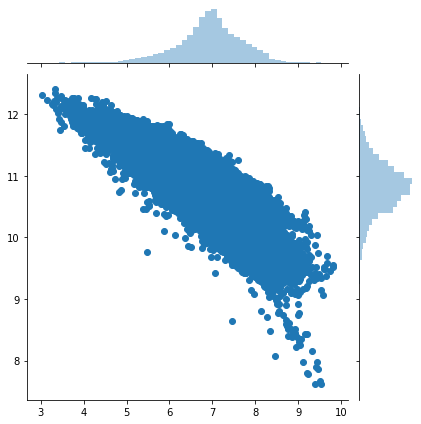

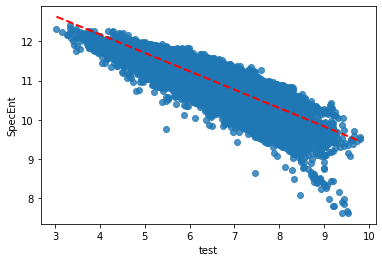

In [12]:
fig = plt.figure()
sns.jointplot(a[:,1], b[:,1])
fig = plt.figure()
sns.regplot('test',meas, data=data, truncate=True, line_kws={'color':'red', 'linewidth':2,'linestyle':'--'})

In [15]:
measure.variables

['wind_speed',
 'temperature',
 'density',
 'pressure',
 'wind_direction_cos',
 'wind_direction_sin']

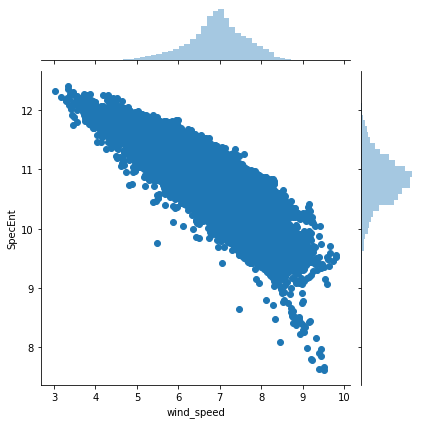

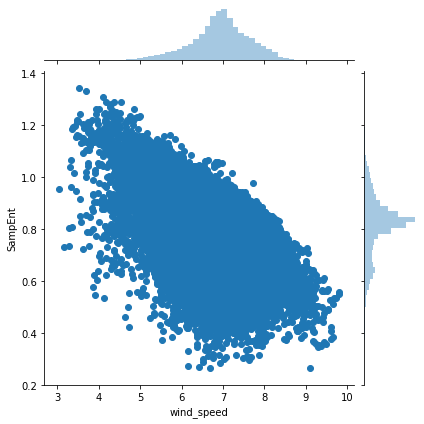

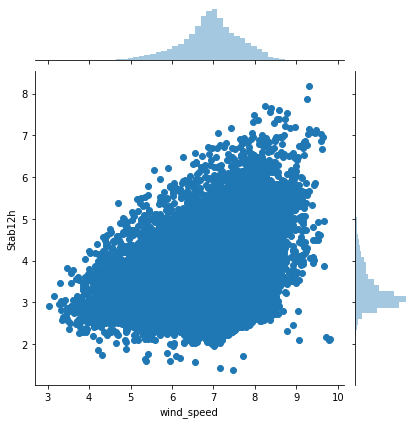

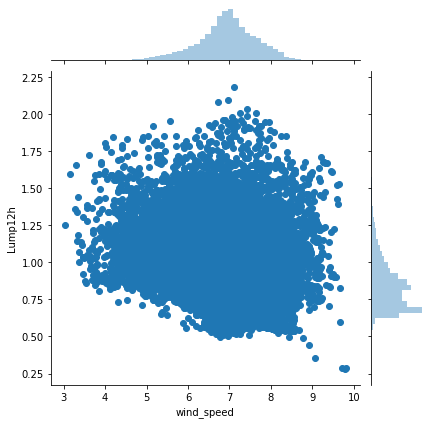

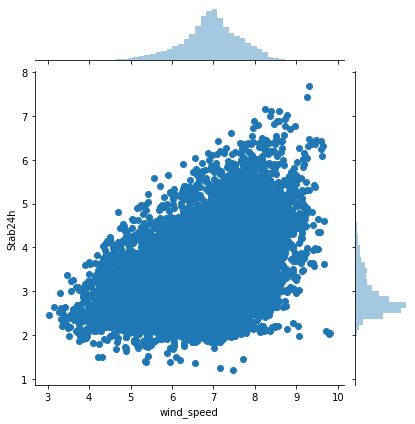

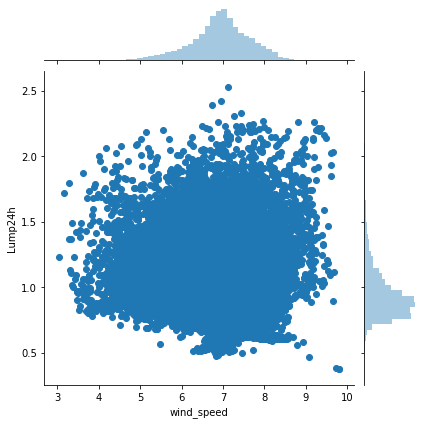

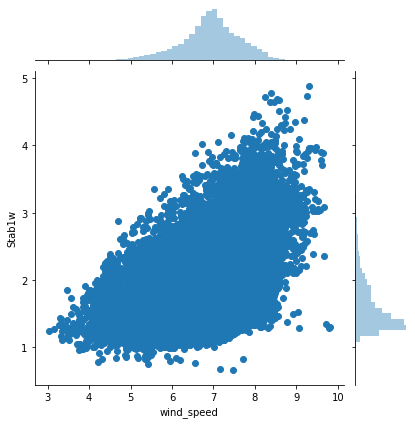

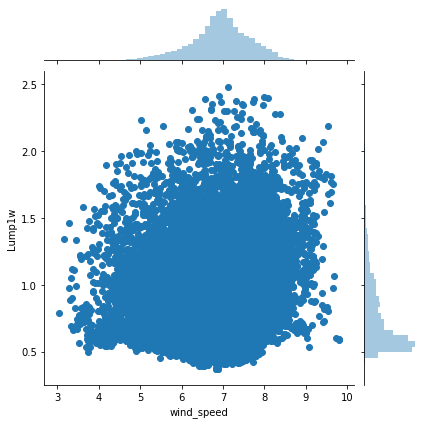

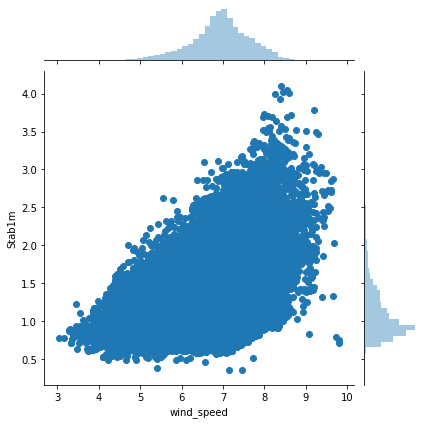

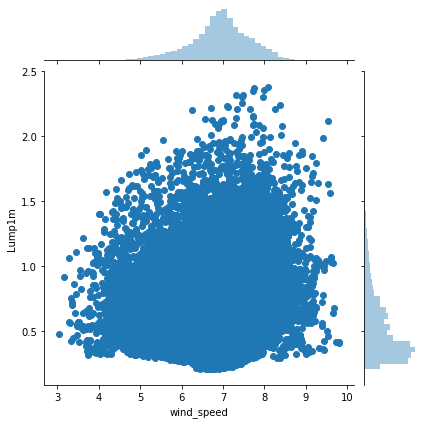

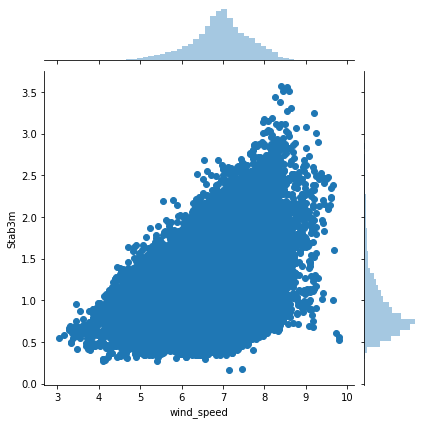

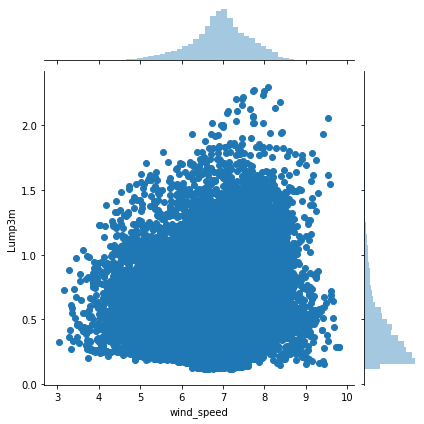

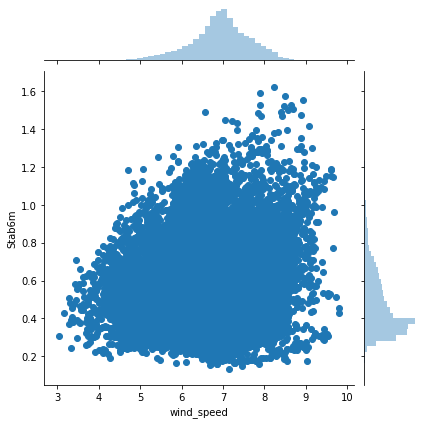

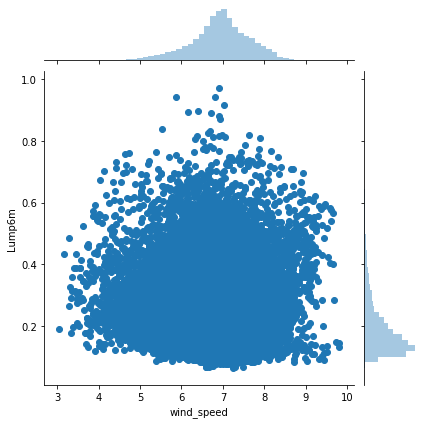

In [17]:
for m in measure.measures:
    b=measure.extract_measure_sites(sites= a[:,0], var='wind_speed', measure=m)
    data = pd.DataFrame({'wind_speed':a[:,1], m:b[:,1]})
    sns.jointplot(x='wind_speed', y=m, data=data)